### Grid based-filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import dataset_loader, SCPlot


sc, coordinates = dataset_loader.load_paper_data()
# create a plot
scplot = SCPlot(sc, coordinates)

In [8]:

f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

#### Subcomponent extraction

Filter size: 0 - Error: 0.0854924527582158
Filter size: 1 - Error: 0.038992959877246255
Filter size: 2 - Error: 0.024919607186593203
Filter size: 3 - Error: 0.006772544158310937
Filter size: 4 - Error: 0.002711903030262226
Filter size: 5 - Error: 0.0011348835310742251
Filter size: 6 - Error: 0.0005374551879284492
Filter size: 7 - Error: 0.00013682117797000117
Filter size: 8 - Error: 4.058657316357547e-05
Filter size: 9 - Error: 1.3591002945417555e-05
Filter size: 10 - Error: 0.00021037257440819666
Filter size: 11 - Error: 0.0013249248540846193
Error 0.7025728579677764


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


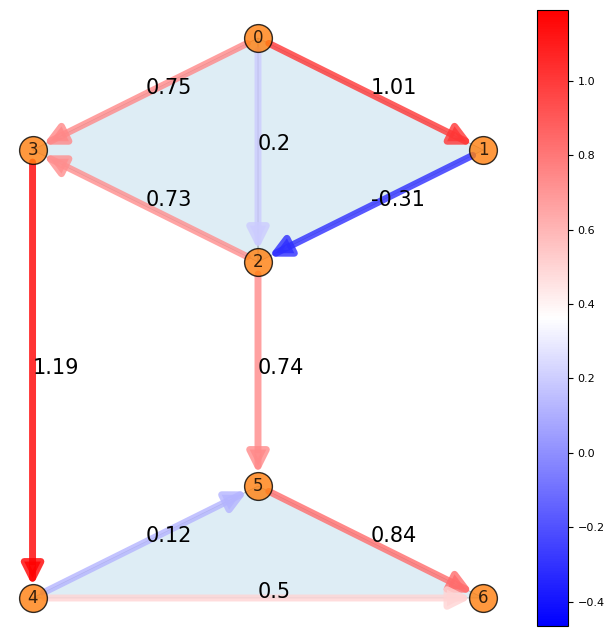

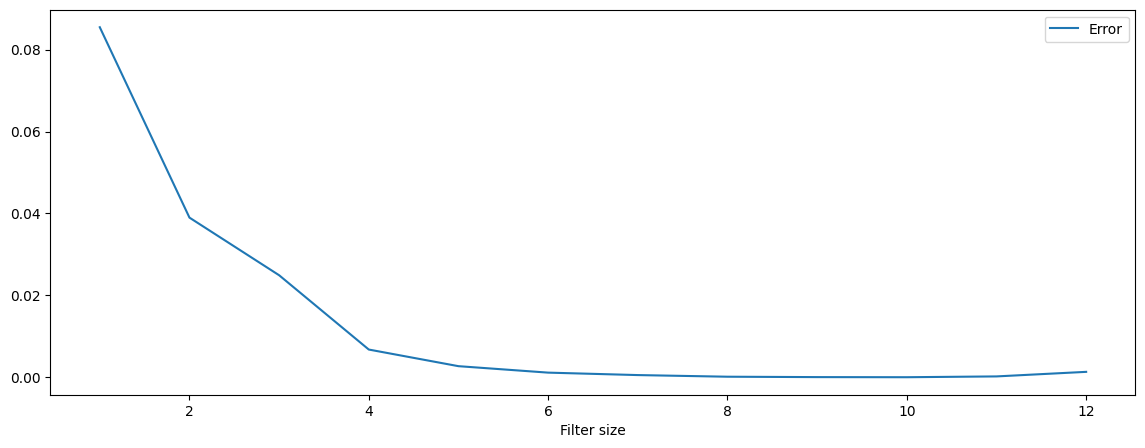

In [9]:
from sclibrary.filters import GridBasedFilterDesign

filter_size = 12

gbf = GridBasedFilterDesign(sc)
gbf.subcomponent_extraction(p_choice="L1", L=filter_size, component="gradient", f=f)

#print("Error:", gbf.history["error"])
f_est = gbf.history["f_estimated"]
print("Error", gbf.calculate_error(f_est, f0))

scplot.draw_network(edge_flow=np.round(f_est, 2))

# plot the error
plt.figure(figsize=(14, 5))
plt.plot(range(1, filter_size + 1), gbf.history["error_per_filter_size"], label="Error")
plt.xlabel("Filter size")
plt.legend()

Filter size: 0 - Error: 0.4731767274523985
Filter size: 1 - Error: 0.2663491289927209
Filter size: 2 - Error: 0.08042646144771572
Filter size: 3 - Error: 0.01900903487647043
Error 0.7325779138357084
[0.47317673 0.26634913 0.08042646 0.01900903]


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


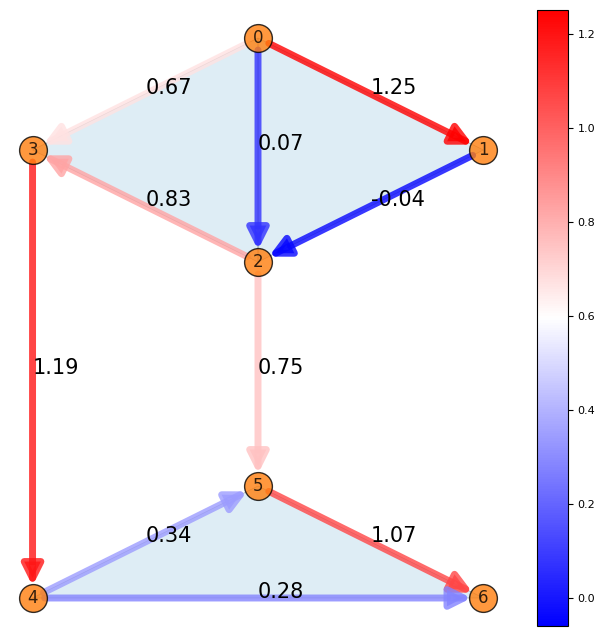

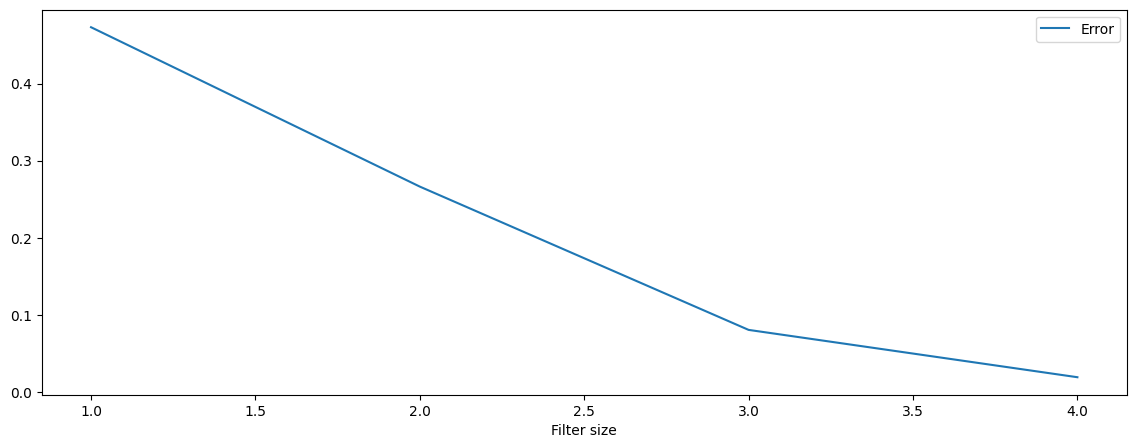

In [10]:
filter_size = 4

gbf = GridBasedFilterDesign(sc)
gbf.subcomponent_extraction(p_choice="L1L", L=filter_size, component="gradient", f=f)

f_est_L1L = gbf.history["f_estimated"]
print("Error", gbf.calculate_error(f_est_L1L, f0))
print(gbf.history["error_per_filter_size"])

scplot.draw_network(edge_flow=np.round(f_est_L1L, 2))

# plot the error
plt.figure(figsize=(14, 5))
plt.plot(range(1, filter_size + 1), gbf.history["error_per_filter_size"], label="Error")
plt.xlabel("Filter size")
plt.legend()

#### General Filter

Filter size: 0 - Error: 0.4731767274523985
Filter size: 0 - Error: 0.29951889577832264
Error: 0.4568487311086471


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


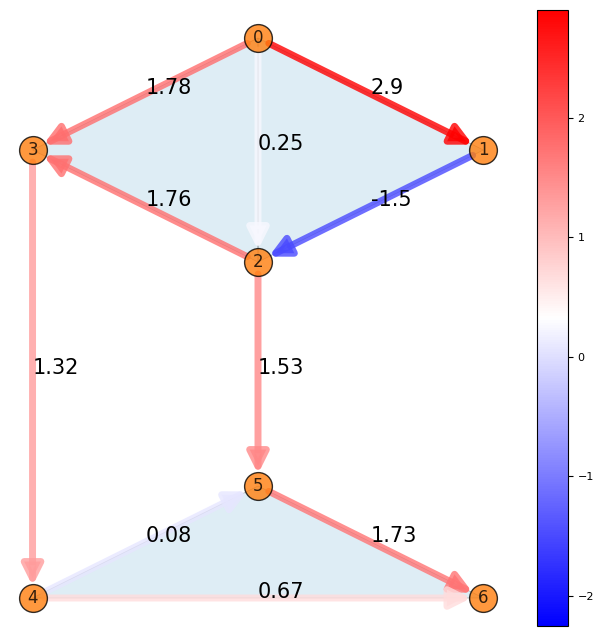

In [11]:
gbf = GridBasedFilterDesign(sc)

f_est_h, f_est_c, f_est_g = gbf.general_filter(
    L1 = 1, L2 = 1, f=f
)

f_est = f_est_h + f_est_c + f_est_g
print("Error:", gbf.calculate_error(f_est, f0))

scplot.draw_network(edge_flow=np.round(f_est, 2))

In [12]:
gbf.history

{'L1': {'filter': array([[0.72861713, 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.72861713, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.72861713, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.72861713, 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.72861713,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.72861713, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.72861713, 0.        , 0.        , 0.        